# Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
test_df = pd.read_csv(r'C:\Users\chris\OneDrive - McGill University\Desktop\McGill\u3\comp551\mini-project_1/adult.test',header=None,na_values = ' ?',names = header)
data_df = pd.read_csv(r'C:\Users\chris\OneDrive - McGill University\Desktop\McGill\u3\comp551\mini-project_1/adult.data',header=None,na_values = ' ?',names = header)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#number of rows x number of columns
print(data_df.shape)
data_df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [5]:
# Create a copy of the dataframe
df = data_df.copy(deep = True)

# convert "?" values to Na for further processing
for col in data_df.columns:
  df[[col]] = data_df[[col]].replace('?',np.NaN)

In [6]:
#select feature column from dataset
null_data = df.iloc[:,:-1]

#count null value for all attributes
null_data.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [7]:
# drop invalid data rows
df = df.dropna()
print(df.shape)

(30162, 15)


In [8]:
#count again for null value after dropna()
null_data = df.iloc[:,:-1]
null_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [9]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Visualization of Data

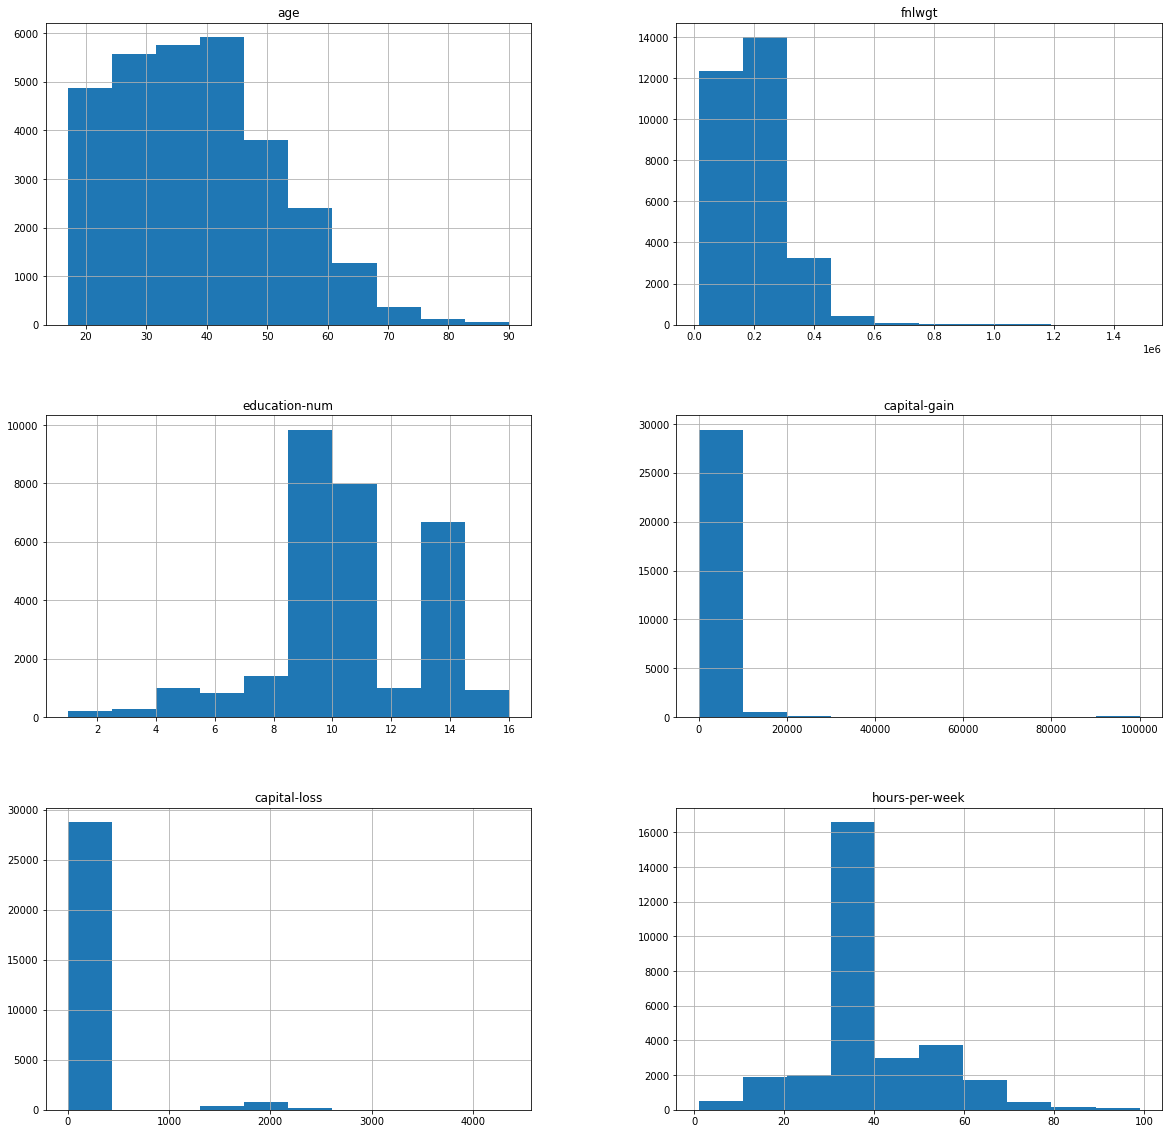

In [10]:
# a histogram display the adult data with 
# y-axis = number of people and
# x-axis = value of feature

p = df.hist(figsize = (20,20))

In [11]:
# df_np = df.to_numpy()

# print(df_np[0])

In [12]:
# x, y = df_np[:,[4,14]], df_np[:,14]                       
# #print the feature shape and classes of dataset 

# # N = number of instance, D = number of feature, C = number of class
# (N,D), C = x.shape, np.max(y)+1
# print(f'instances (N) \t {N} \nfeatures (D) \t {D} \nclasses (C) \t {C}')
# print(f'\nsalary <= 50k is 0 \nsalary >= 50k is 1')

# inds = np.random.permutation(N)                                                    

# #split the dataset into train and validation set
# x_train, y_train = x[inds[:1000]], y[inds[:1000]]
# x_test, y_test = x[inds[1000:]], y[inds[1000:]]

# #visualization of the data
# plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
# plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
# plt.legend()
# plt.ylabel('salary')
# plt.xlabel('education-num')
# plt.show()

# One-hot Encoding

In [13]:
# Converting 'sex' and 'salary' to numerical

# Male = 1, Female = 0
df["sex"] = np.where(df.sex == ' Male', 1, 0)
# Salary > 50K = 1, < 50K = 0
df["salary"] = np.where(df.salary == ' >50K', 1 , 0)


In [14]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# 

In [15]:
# Create a dataframe with object data type
obj_col= []
for col in df.columns:
    if df[col].dtype == "object":
        obj_col.append(col)
print(obj_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


In [16]:
# Create a dataframe with object data type
int_col= []
for col in df.columns:
    if df[col].dtype == "int64":
        int_col.append(col)
print(int_col)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [17]:
# Create copies of dataset for data preparation purposes
df_copy = df.copy(deep = True)

In [18]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler

# Normalize numeric attributes and assign it into a new dataframe
df_int = pd.DataFrame(std_scaler.fit_transform(df_copy[int_col]), columns=int_col)

In [19]:
df_int.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734


In [20]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# enconde categorical features into numerical features
df_obj = df.copy()
df_obj.drop(int_col,axis='columns', inplace=True)

#print(df_obj)

for col in df_obj.columns[:]:
  if df_obj[col].dtype == "object":
    df_obj[col] = ord_enc.fit_transform(df_obj[[col]])
    
print(df_obj)

       workclass  education  marital-status  occupation  relationship  race  \
0            5.0        9.0             4.0         0.0           1.0   4.0   
1            4.0        9.0             2.0         3.0           0.0   4.0   
2            2.0       11.0             0.0         5.0           1.0   4.0   
3            2.0        1.0             2.0         5.0           0.0   2.0   
4            2.0        9.0             2.0         9.0           5.0   2.0   
...          ...        ...             ...         ...           ...   ...   
32556        2.0        7.0             2.0        12.0           5.0   4.0   
32557        2.0       11.0             2.0         6.0           0.0   4.0   
32558        2.0       11.0             6.0         0.0           4.0   4.0   
32559        2.0       11.0             4.0         0.0           3.0   4.0   
32560        3.0       11.0             2.0         3.0           5.0   4.0   

       sex  native-country  salary  
0        1    

In [21]:
# Insert id column to different datasets
df_int.insert(0, 'id', range(0, 0 + len(df_int)))
df_obj.insert(0, 'id', range(0, 0 + len(df_obj)))

# Show shapes for datasets
#print(df_int.shape)
print("-----------------df_int------------------")
print(df_int)
#print(df_obj.shape)
print("-----------------df_obj------------------")
print(df_obj)

-----------------df_int------------------
          id       age    fnlwgt  education-num  capital-gain  capital-loss  \
0          0  0.042796 -1.062722       1.128918      0.146092     -0.218586   
1          1  0.880288 -1.007871       1.128918     -0.147445     -0.218586   
2          2 -0.033340  0.244693      -0.439738     -0.147445     -0.218586   
3          3  1.108695  0.425240      -1.224066     -0.147445     -0.218586   
4          4 -0.794697  1.406658       1.128918     -0.147445     -0.218586   
...      ...       ...       ...            ...           ...           ...   
30157  30157 -0.870832  0.638972       0.736754     -0.147445     -0.218586   
30158  30158  0.118931 -0.335252      -0.439738     -0.147445     -0.218586   
30159  30159  1.489374 -0.358575      -0.439738     -0.147445     -0.218586   
30160  30160 -1.251511  0.110705      -0.439738     -0.147445     -0.218586   
30161  30161  1.032559  0.928841      -0.439738      1.881120     -0.218586   

       ho

In [22]:
# Merge all datasets
df_feature = pd.merge(df_int,df_obj, on=["id"])

# Show the the tope 5 obersrvation of the dataset
df_feature.head(5)

,id,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,5.0,9.0,4.0,0.0,1.0,4.0,1,38.0,0
1,1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,4.0,9.0,2.0,3.0,0.0,4.0,1,38.0,0
2,2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,2.0,11.0,0.0,5.0,1.0,4.0,1,38.0,0
3,3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,2.0,1.0,2.0,5.0,0.0,2.0,1,38.0,0
4,4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,2.0,9.0,2.0,9.0,5.0,2.0,0,4.0,0


In [23]:
# drop id column
df_feature.drop('id',axis='columns', inplace=True)

In [24]:
df_feature.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,5.0,9.0,4.0,0.0,1.0,4.0,1,38.0,0
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,4.0,9.0,2.0,3.0,0.0,4.0,1,38.0,0
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,2.0,11.0,0.0,5.0,1.0,4.0,1,38.0,0
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,2.0,1.0,2.0,5.0,0.0,2.0,1,38.0,0
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,2.0,9.0,2.0,9.0,5.0,2.0,0,4.0,0


In [25]:
data = df_feature.to_numpy()

# KNN 5-fold Cross Validation

In [26]:
# reduce some unnecessary features for KNN

df_knn = df_feature.copy()

df_knn.drop('fnlwgt',axis='columns', inplace=True)
df_knn.drop('age',axis='columns', inplace=True)
df_knn.drop('native-country',axis='columns', inplace=True)


# df_knn.head(5)

In [27]:
def split(dataset, folds):
    return np.array_split(dataset, folds)

In [28]:
def KNN_cross_validation(dataset, folds, K):
    
    best_acc = 0
    best_config = 0
    best_model = neighbors.KNeighborsClassifier(n_neighbors=1)
    scores=[]
    
    for k in np.arange(1,K):

        model = neighbors.KNeighborsClassifier(n_neighbors=k)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)

            # model.fit(training[:,:14], training[:,14])
            # pred = model.predict(validation[:,:14])
            # acc = np.sum(pred == validation[:,14])/len(validation[:,14])
            # acc_l += acc

            model.fit(training[:,:-1],training[:,-1])
            pred = model.predict(validation[:,:-1])
            acc = np.mean(pred == validation[:,-1])
            acc_l.append(acc)

        acc_m = np.mean(acc_l)
        scores.append(acc_m)
        
        if best_acc < acc_m:
            best_acc = acc_m
            best_config = k
            best_model = model

    return  best_acc, best_config, best_model, scores


# Decision Tree K-fold Cross Validation 

In [43]:
from sklearn.tree import DecisionTreeClassifier

def DT_cross_validation(dataset, folds, depth):
    
    best_acc = 0
    best_config = 0
    best_model = DecisionTreeClassifier(max_depth=1)
    scores=[]

    for d in np.arange(1,depth):

        model = DecisionTreeClassifier(max_depth=d)
        
        data_splited = split(dataset, folds)
        
        for i in range(folds):
            
            acc_l = list()
            validation = data_splited[i]

            r = list(range(folds))
            r.pop(i)

            for j in r:

                if j == r[0] :
                    training = data_splited[j]
                else:
                    training = np.concatenate((training,data_splited[j]), axis=0)
        
            model.fit(training[:,:-1],training[:,-1])
            pred = model.predict(validation[:,:-1])
            acc = np.mean(pred == validation[:,-1])
            acc_l.append(acc)

        acc_m = np.mean(acc_l)
        scores.append(acc_m)

        if best_acc < acc_m:
                best_acc = acc_m
                best_config = d
                best_model = model
    
    return  best_acc, best_config, best_model, scores

# Training - Dataset 1

In [36]:
def train(dataset, index, indicator, r, folds=5):
    
    best_acc = 0
    best_config = 0
    best_knn_model= neighbors.KNeighborsClassifier(n_neighbors=1)
    best_dt_model = DecisionTreeClassifier(max_depth=1)
    scores_k = []
    scores_dt = []
    
    for size in r:
        print('Size of Training Set: ',size)
        if indicator == 'KNN':
            acc, config, KNN_model, scores_k = KNN_cross_validation(dataset[:size], folds, index)
            print('KNN: ', acc, config, KNN_model)

            pred = KNN_model.predict(dataset[size:,:-1])
            acc = np.mean(pred == dataset[size:,-1])
            print(acc)

            if best_acc < acc:
                best_acc = acc
                best_config = config
                best_knn_model = KNN_model

        if indicator == 'DT':
            acc, config, DT_model, scores_dt = DT_cross_validation(dataset[:size], folds, index)
            print('Decision tree: ',acc, config, DT_model)

            pred = DT_model.predict(dataset[size:,:-1])
            acc = np.mean(pred == dataset[size:,-1])
            print(acc)

            if best_acc < acc:
                best_acc = acc
                best_config = config
                best_dt_model = DT_model

    if indicator == 'KNN':
        return best_acc, best_config, best_knn_model, scores_k

    if indicator == 'DT':
        return best_acc, best_config, best_dt_model,scores_dt

In [37]:
size = data.shape[0]

size20 = int(size * 0.2)

size40 = int(size * 0.4)

size60 = int(size * 0.6)

size80 = int(size * 0.8)

r = np.array([size20, size40, size60, size80])

In [38]:
from sklearn import neighbors

best_acc_k = 0
best_config_k = 0
best_acc_dt = 0
best_config_dt = 0
best_knn_model= neighbors.KNeighborsClassifier(n_neighbors=1)
best_dt_model = DecisionTreeClassifier(max_depth=1)
scores_k = []
scores_dt = []



In [40]:
best_acc_k, best_config_k, best_knn_model, scores_k = train(data, 20, 'KNN', r)

Size of Training Set:  6032
KNN:  0.8300165837479271 4 KNeighborsClassifier(n_neighbors=4)
0.8074181516784086
Size of Training Set:  12064
KNN:  0.8349917081260365 18 KNeighborsClassifier(n_neighbors=18)
0.8229638634103216
Size of Training Set:  18097
KNN:  0.8261950815142305 17 KNeighborsClassifier(n_neighbors=17)
0.8256112722751762
Size of Training Set:  24129
KNN:  0.8352331606217617 19 KNeighborsClassifier(n_neighbors=19)
0.8239681750372949


# Visualization of accuracy of k for KNN

The optimal number of neighbors is 17
The optimal score is 0.84


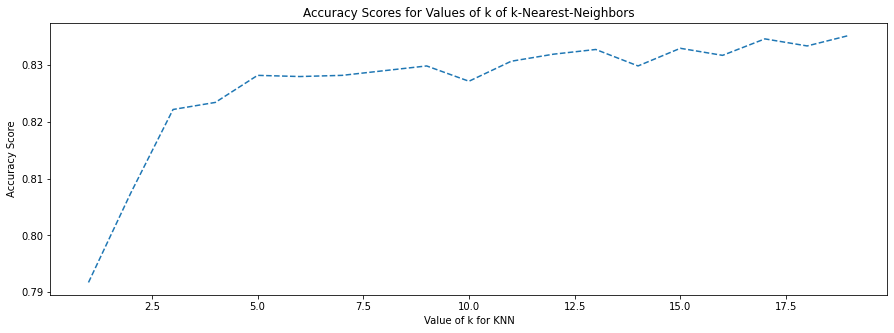

In [59]:

# different values of k for the KNN (from k=1 up to k=20)
lstrange=list(range(1,20))

    

plt.figure(2,figsize=(15,5))

# best_k = best_config #!!!!!!!!!!! fix: best_config from cross-validation
print("The optimal number of neighbors is %d" % best_config_k)
print("The optimal score is %.2f" % max(scores_k))

# plot
plt.plot(lstrange, scores_k,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [44]:
best_acc_dt, best_config_dt, best_dt_model, scores_td = train(data, 15, 'DT', r)

Size of Training Set:  6032
Decision tree:  0.8391376451077943 3 DecisionTreeClassifier(max_depth=3)
0.8395772896808952
Size of Training Set:  12064
Decision tree:  0.8387230514096186 7 DecisionTreeClassifier(max_depth=7)
0.8436843850149188
Size of Training Set:  18097
Decision tree:  0.8505111909367229 8 DecisionTreeClassifier(max_depth=8)
0.8479900538748446
Size of Training Set:  24129
Decision tree:  0.8567875647668394 10 DecisionTreeClassifier(max_depth=10)
0.8473396320238687


# Visualization of accuracy of decision tree

The optimal number of hyper-parameter is 8
The optimal score is 0.86


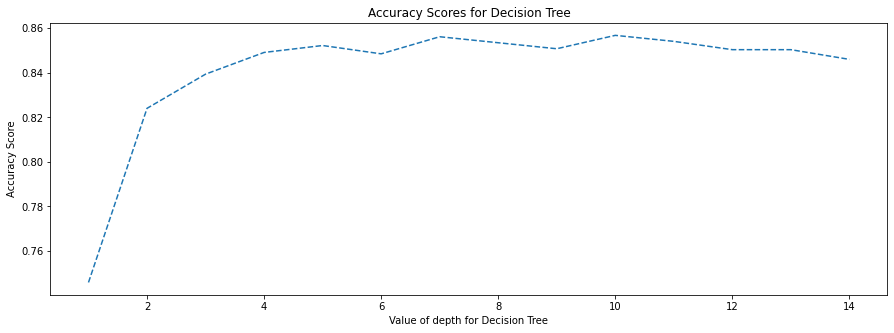

In [63]:
# different values of k for the KNN (from k=1 up to k=20)
lstrange_dt=list(range(1,15))

    

plt.figure(2,figsize=(15,5))

# best_k = best_config #!!!!!!!!!!! fix: best_config from cross-validation
print("The optimal number of hyper-parameter is %d" % best_config_dt)
print("The optimal score is %.2f" % max(scores_td))

# plot
plt.plot(lstrange_dt, scores_td,ls='dashed')
plt.xlabel('Value of depth for Decision Tree')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Decision Tree')
plt.show()

# Dataset 2

In [49]:
data_df = pd.read_csv(r'C:\Users\chris\OneDrive - McGill University\Desktop\McGill\u3\comp551\mini-project_1\bank-additional\bank-additional-full.csv', sep =';')

In [50]:
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [52]:
#check for null
missing_values = data_df.isnull().mean()*100
missing_values.sum()

0.0

In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load data
# data = pd.read_csv('C:/Jiayang/JupyterLab/Comp_551/mini_project_1/bank-additional-full.csv', sep = ";")
# Variables names

data = data_df.copy(True)
var_names = data.columns.tolist()

# Categorical vars
categs = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
# Quantitative vars
quantit = [i for i in var_names if i not in categs]

# Get dummy variables for categorical vars
job = pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
education = pd.get_dummies(data['education'])
default = pd.get_dummies(data['default'])
housing = pd.get_dummies(data['housing'])
loan = pd.get_dummies(data['loan'])
contact = pd.get_dummies(data['contact'])
month = pd.get_dummies(data['month'])
day = pd.get_dummies(data['day_of_week'])
poutcome = pd.get_dummies(data['poutcome'])

# Map variable to predict
dict_map = dict()
y_map = {'yes':1,'no':0}
dict_map['y'] = y_map
data = data.replace(dict_map)
label = data['y']

df1 = data[quantit]
df1_names = df1.keys().tolist()

# Scale quantitative variables
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df1)
df1 = pd.DataFrame(x_scaled)
df1.columns = df1_names

# Get final df
final_df = pd.concat([df1,
                      job,
                      marital,
                      education,
                      default,
                      housing,
                      loan,
                      contact,
                      month,
                      day,
                      poutcome,
                      label], axis=1)

# Quick check
final_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,0,1,0,0,0,0,1,0,0


In [54]:
data2 = final_df.to_numpy()
data2

array([[0.48148148, 0.05307035, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.49382716, 0.03029687, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.24691358, 0.04595364, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.        ,
        0.        ]])

# Training - Dataset 2

In [55]:
size = data2.shape[0]
size20 = int(size * 0.2)
size40 = int(size * 0.4)
size60 = int(size * 0.6)
size80 = int(size * 0.8)
r = np.array([size20,size40,size60,size80])

In [65]:
scores = []
acc,config,KNN_model,scores = KNN_cross_validation(data2[:size20],5,20)
pred= KNN_model.predict(data2[size20:,:-1])
acc = np.mean(pred == data2[size20:,-1])
print(acc)

0.8673484871475827


In [ ]:
train(data2, 20, 'KNN', r)

In [ ]:
train(data2, 15, 'DT', r)